# Wine Quality Data Visualization

This notebook demonstrates how to explore and visualize wine quality data using Python. We will use the red wine quality dataset to understand relationships between physicochemical properties and wine quality ratings.

**Learning Objectives:**
- Load and explore a dataset
- Create univariate (single variable) visualizations
- Create bivariate (two variable) visualizations
- Analyze correlations between variables
- Understand data distributions and relationships

In [43]:
import pandas as pd # for data manipulation
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for creating plots and figures
import seaborn as sns # for statistical visualizations (built on matplotlib)


## 2. Set Custom Color Theme (Optional)

We will use custom colors for our visualizations. This step is optional but helps create consistent, branded visualizations. Here we use University of Illinois colors.

In [ ]:
# Custom Illinois colors for consistent visualization theme
illiniorange = "#FF5F05"
illiniblue = "#13294B"

## 3. Load and Explore the Dataset

We'll load the red wine quality dataset. This dataset contains physicochemical measurements of red wines and their quality ratings (scored from 3 to 8).

**Dataset Reference:** Cortez, P., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties.

In [32]:
# Load the dataset
df = pd.read_csv("data/winequality-red.csv")

# Display basic information about the dataset
print("Dataset Shape (rows, columns):", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDistribution of wine quality ratings:")
print(df["quality"].value_counts().sort_index())


Dataset Shape (rows, columns): (1599, 12)

First few rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0    

## 4. Descriptive Statistics

Descriptive statistics help us understand the central tendencies, spread, and distribution of our data. We'll calculate summary statistics for all variables and also group them by quality rating.


In [34]:
# Calculate overall descriptive statistics for all numeric variables
# .T transposes the result for better readability
desc = df.describe().T
print("Overall Descriptive Statistics:")
print(desc)

print("\n" + "="*80)
print("\nDescriptive Statistics Grouped by Quality Rating:")
quality_desc = df.groupby("quality").describe().T
print(quality_desc.head(20))  # Show first 20 rows to avoid overwhelming output


Overall Descriptive Statistics:
                       count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50% 

## 5. Coefficient of Variation

The coefficient of variation (CV) measures relative variability - it's the ratio of standard deviation to the mean. Higher CV values indicate more variability relative to the mean. This helps identify which variables vary the most across samples.


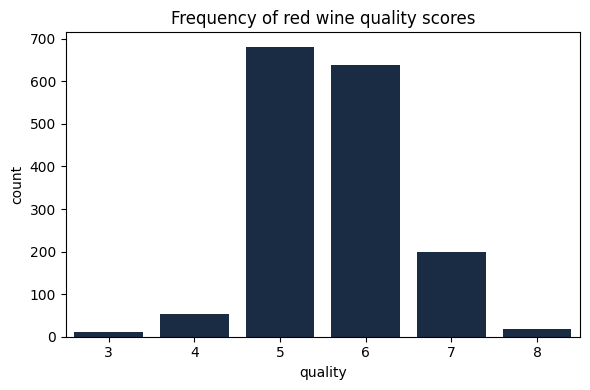

In [ ]:

# Calculate coefficient of variation for all numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns
cv = df[numeric_cols].std() / df[numeric_cols].mean()
print("Coefficient of Variation (sorted by highest variability):")
print(cv.sort_values(ascending=False))

## 6. Univariate Distributions

Univariate analysis examines the distribution of individual variables. Histograms show the frequency of values, and KDE (Kernel Density Estimation) curves show the smoothed probability distribution. This helps us understand if variables are normally distributed, skewed, or have multiple peaks.

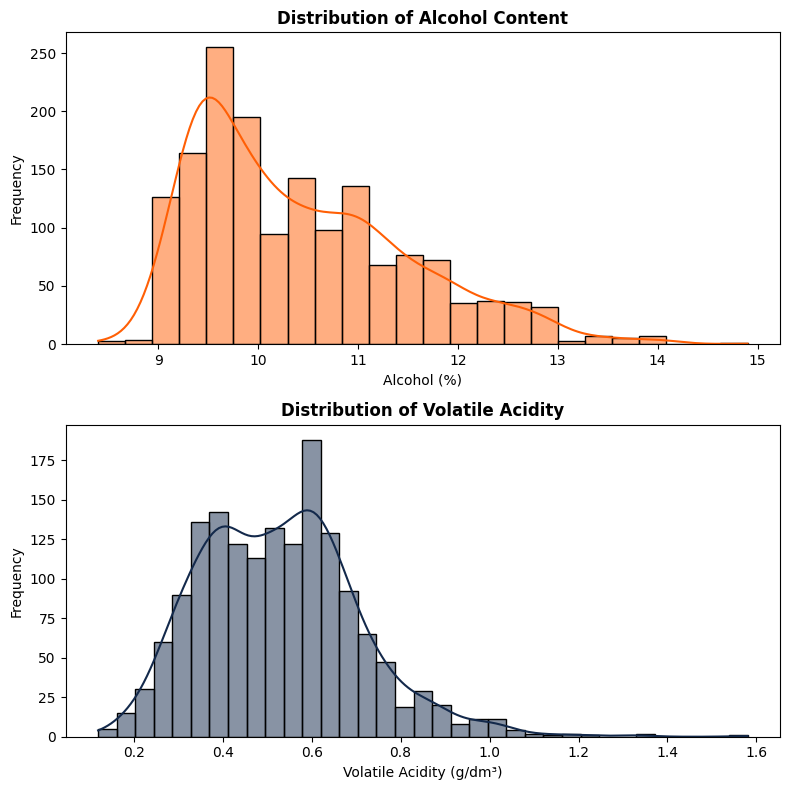

In [36]:
# Create histograms with KDE (Kernel Density Estimation) curves
# KDE provides a smoothed estimate of the probability distribution
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Alcohol distribution (orange)
sns.histplot(df["alcohol"], kde=True, ax=axes[0], color=illiniorange)
axes[0].set_title("Distribution of Alcohol Content", fontsize=12, weight='bold')
axes[0].set_xlabel("Alcohol (%)", fontsize=10)
axes[0].set_ylabel("Frequency", fontsize=10)

# Volatile acidity distribution (blue)
sns.histplot(df["volatile acidity"], kde=True, ax=axes[1], color=illiniblue)
axes[1].set_title("Distribution of Volatile Acidity", fontsize=12, weight='bold')
axes[1].set_xlabel("Volatile Acidity (g/dm³)", fontsize=10)
axes[1].set_ylabel("Frequency", fontsize=10)

plt.tight_layout()
plt.show()

## 7. Distribution of Quality Ratings

A count plot shows how many samples fall into each quality category. This helps us understand if the dataset is balanced (equal samples per category) or imbalanced (some categories have many more samples than others).


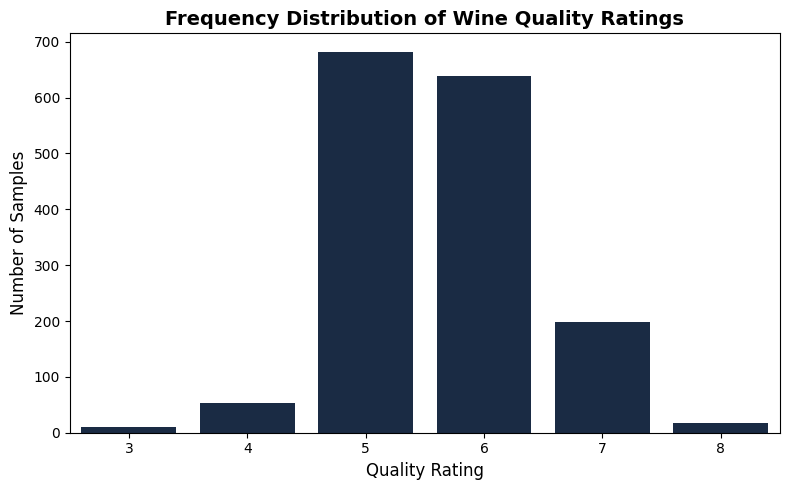

In [37]:
# Create a count plot showing the frequency of each quality rating
plt.figure(figsize=(8, 5))
sns.countplot(x="quality", data=df, color=illiniblue)
plt.title("Frequency Distribution of Wine Quality Ratings", fontsize=14, weight='bold')
plt.xlabel("Quality Rating", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.tight_layout()
plt.show()


## 8. Bivariate Analysis: Quality vs Predictors

Bivariate analysis examines relationships between two variables. Boxplots show how the distribution of a predictor variable (like alcohol or volatile acidity) differs across quality categories. This helps identify which variables are most associated with wine quality.


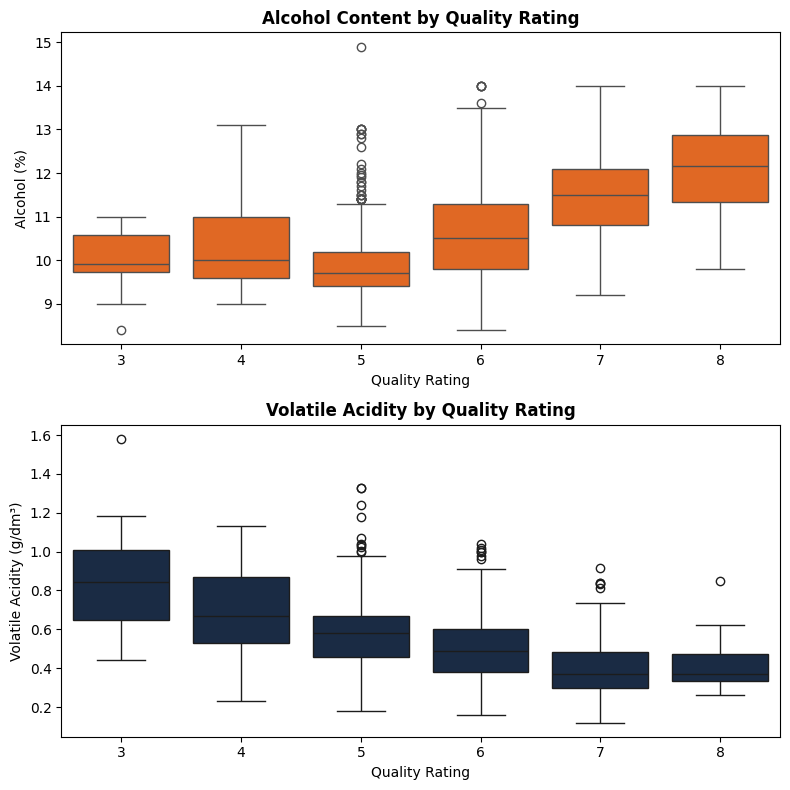

In [38]:
# Boxplots show the distribution of variables across different quality levels
# The box shows quartiles, whiskers show the range, and points show outliers
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Alcohol content by quality class
sns.boxplot(x="quality", y="alcohol", data=df, ax=axes[0], color=illiniorange)
axes[0].set_title("Alcohol Content by Quality Rating", fontsize=12, weight='bold')
axes[0].set_xlabel("Quality Rating", fontsize=10)
axes[0].set_ylabel("Alcohol (%)", fontsize=10)

# Volatile acidity by quality class
sns.boxplot(x="quality", y="volatile acidity", data=df, ax=axes[1], color=illiniblue)
axes[1].set_title("Volatile Acidity by Quality Rating", fontsize=12, weight='bold')
axes[1].set_xlabel("Quality Rating", fontsize=10)
axes[1].set_ylabel("Volatile Acidity (g/dm³)", fontsize=10)

plt.tight_layout()
plt.show()


## 9. Scatter Plots with Regression Lines

Scatter plots with regression lines show the relationship between a predictor variable and quality. The regression line indicates the trend: positive slope means higher values of the predictor are associated with higher quality, negative slope means the opposite.


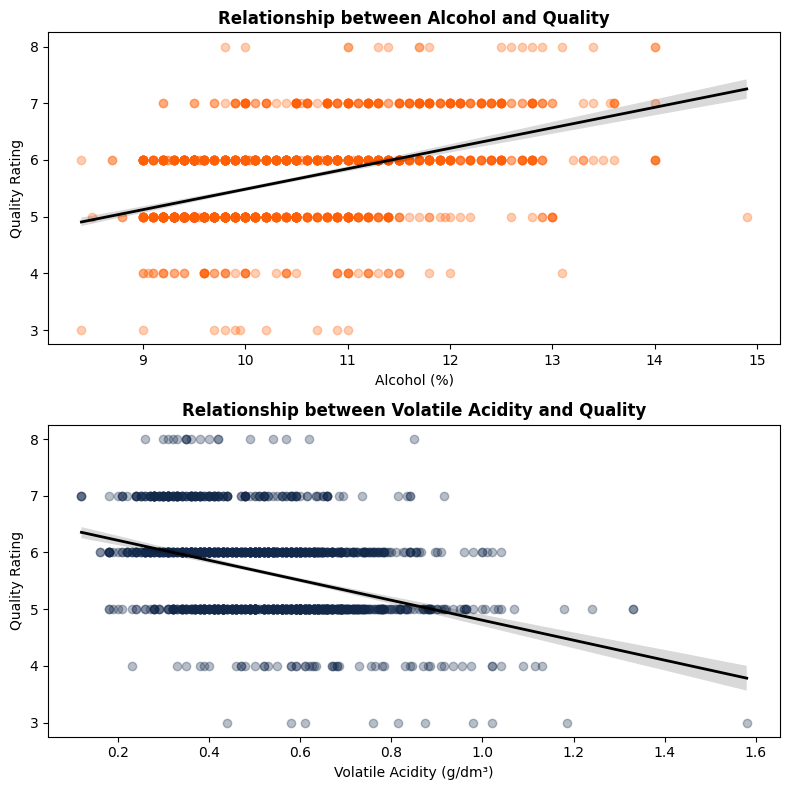

In [39]:
# Scatter plots with regression lines show the relationship between variables
# The line shows the trend, and points show individual samples
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Alcohol vs Quality
sns.regplot(x="alcohol", y="quality", data=df,
            scatter_kws={"alpha": 0.3, "color": illiniorange}, 
            line_kws={"color": "black", "linewidth": 2},
            ax=axes[0])
axes[0].set_title("Relationship between Alcohol and Quality", fontsize=12, weight='bold')
axes[0].set_xlabel("Alcohol (%)", fontsize=10)
axes[0].set_ylabel("Quality Rating", fontsize=10)

# Volatile acidity vs Quality
sns.regplot(x="volatile acidity", y="quality", data=df,
            scatter_kws={"alpha": 0.3, "color": illiniblue}, 
            line_kws={"color": "black", "linewidth": 2},
            ax=axes[1])
axes[1].set_title("Relationship between Volatile Acidity and Quality", fontsize=12, weight='bold')
axes[1].set_xlabel("Volatile Acidity (g/dm³)", fontsize=10)
axes[1].set_ylabel("Quality Rating", fontsize=10)

plt.tight_layout()
plt.show()


## 10. Correlation Analysis

Correlation measures the strength and direction of linear relationships between variables. Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no linear relationship. A correlation heatmap provides a visual summary of all pairwise correlations.


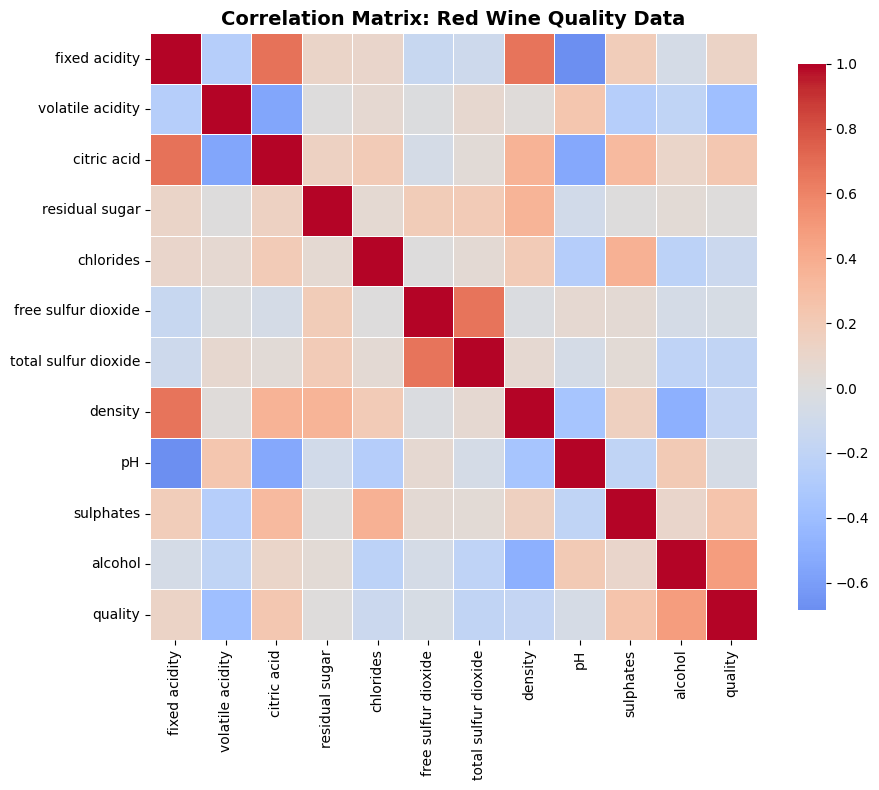

In [40]:
# Calculate correlation matrix for all numeric variables
corr = df.corr(numeric_only=True)

# Create a heatmap to visualize correlations
# Red indicates positive correlation, blue indicates negative correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0,
            square=True, cbar_kws={"shrink": 0.9}, linewidths=0.5)
plt.title("Correlation Matrix: Red Wine Quality Data", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


### Correlations with Quality

Let's examine which variables are most strongly correlated with wine quality. This helps identify the most important predictors of quality.


In [41]:
# Extract and sort correlations with quality
corr_quality = corr["quality"].sort_values(ascending=False)
print("Correlations with Quality (sorted from highest to lowest):")
print("="*60)
for var, corr_val in corr_quality.items():
    if var != "quality":  # Skip self-correlation
        direction = "positive" if corr_val > 0 else "negative"
        print(f"{var:25s}: {corr_val:7.4f} ({direction})")


Correlations with Quality (sorted from highest to lowest):
alcohol                  :  0.4762 (positive)
sulphates                :  0.2514 (positive)
citric acid              :  0.2264 (positive)
fixed acidity            :  0.1241 (positive)
residual sugar           :  0.0137 (positive)
free sulfur dioxide      : -0.0507 (negative)
pH                       : -0.0577 (negative)
chlorides                : -0.1289 (negative)
density                  : -0.1749 (negative)
total sulfur dioxide     : -0.1851 (negative)
volatile acidity         : -0.3906 (negative)


## 11. Pairwise Relationships (Pair Plot)

A pair plot creates a grid of scatter plots showing relationships between multiple variables simultaneously. The diagonal shows the distribution of each variable. This is useful for exploring complex relationships, but can be computationally intensive with many variables, so we'll use a subset.


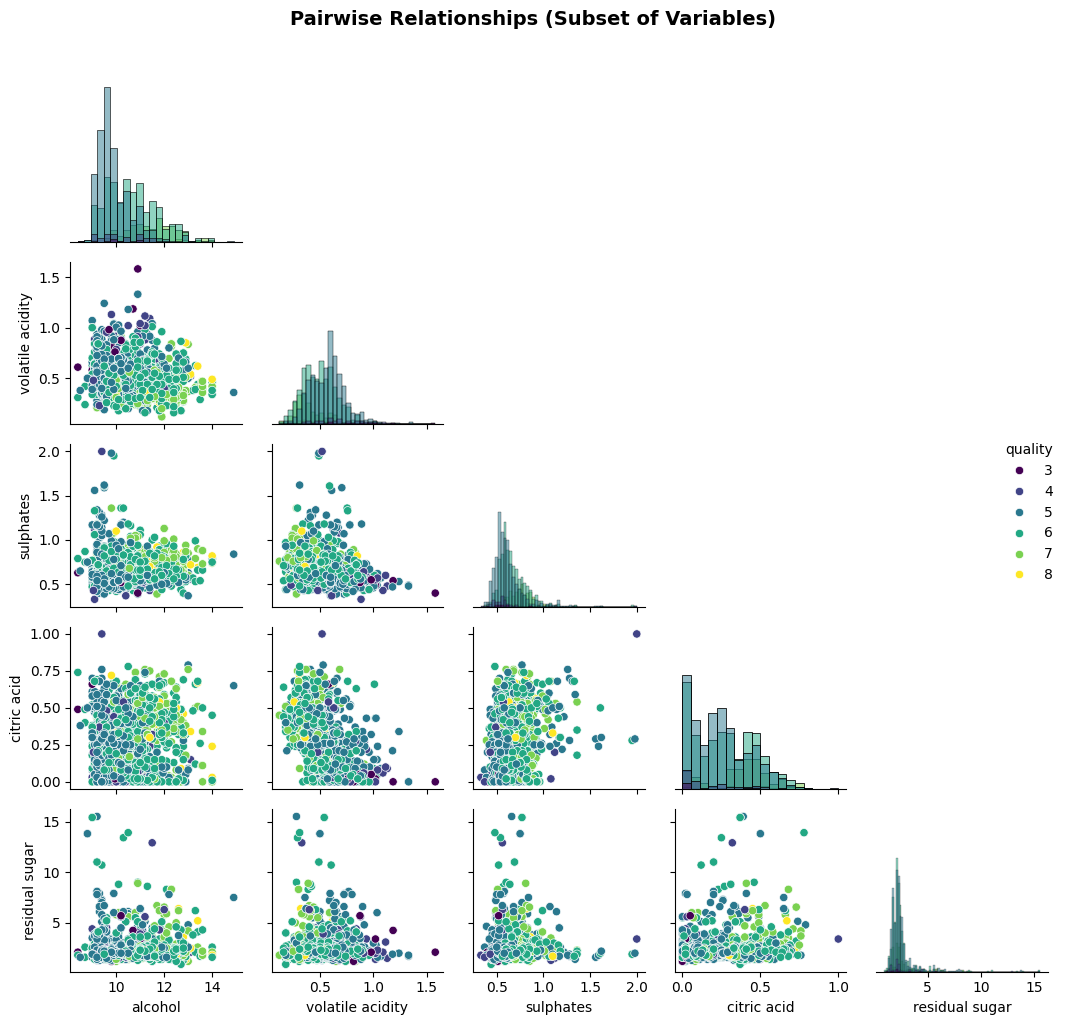

In [42]:
# Select a subset of variables for the pair plot to keep it readable
# We include quality and some key predictors
subset = ["quality", "alcohol", "volatile acidity",
          "sulphates", "citric acid", "residual sugar"]

# Create pair plot
# - corner=True: Only show lower triangle (avoids duplicate plots)
# - hue="quality": Color points by quality rating
# - diag_kind="hist": Show histograms on the diagonal
sns.pairplot(df[subset], hue="quality", corner=True,
             diag_kind="hist", palette="viridis", height=2)
plt.suptitle("Pairwise Relationships (Subset of Variables)", 
             y=1.02, fontsize=14, weight='bold')
plt.tight_layout()
plt.show()
